Veri Yükleme

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

df = pd.read_csv("Churn Modeling.csv")

Gereksiz Sütunları Çıkarma

In [38]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"], axis=1)

'Geography' ve 'Gender' Sütunlarını One-Hot Vectör Yapma

In [39]:
df_encoded = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

Bağımsız değişkenler (X) ve hedef değişken (y) ayırma

In [40]:
X = df_encoded.drop(columns=["Exited"], axis=1)
y = df_encoded["Exited"]

Veriyi train-test ve cross-validation kümelerine bölme

In [41]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Decision Tree oluşturma ve cross-validation yaparak optimal ağaç derinliğini  bulma

In [42]:
max_depth_values = range(1, 11) 
cv_scores = []

for depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(model, X_cv, y_cv, cv=5)
    cv_scores.append(scores.mean())

best_depth = max_depth_values[cv_scores.index(max(cv_scores))]

Optimal derinlikle modeli eğitme

In [43]:
best_model = DecisionTreeClassifier(max_depth=best_depth)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Confusion Matrix Sonuçları

In [47]:
y_pred = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

tp = conf_matrix[1, 1]
fp = conf_matrix[0, 1]
tn = conf_matrix[0, 0]
fn = conf_matrix[1, 0]

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Specificity: {specificity:.4f}")

Accuracy: 0.8573
Recall: 0.3556
Precision: 0.7652
Specificity: 0.9745


Cross_validation grafiğini çizme

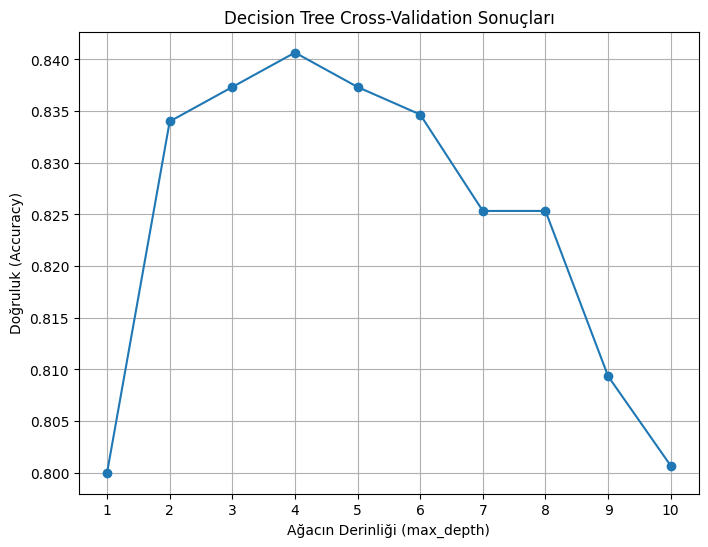

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, cv_scores, marker='o')
plt.title("Decision Tree Cross-Validation Sonuçları")
plt.xlabel("Ağacın Derinliği (max_depth)")
plt.ylabel("Doğruluk (Accuracy)")
plt.xticks(max_depth_values)
plt.grid()
plt.show()